# Importing packages

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import scipy
import numpy as np
#import pickle-mixin
import seaborn as sns
#import Flask

# Loading the dataset

In [2]:
data=pd.read_csv(r"C:\Users\vatha\Downloads\survey.csv")

In [3]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [4]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Data Pre-Processing
### Removing Unnecessary Columns

<Axes: xlabel='Country'>

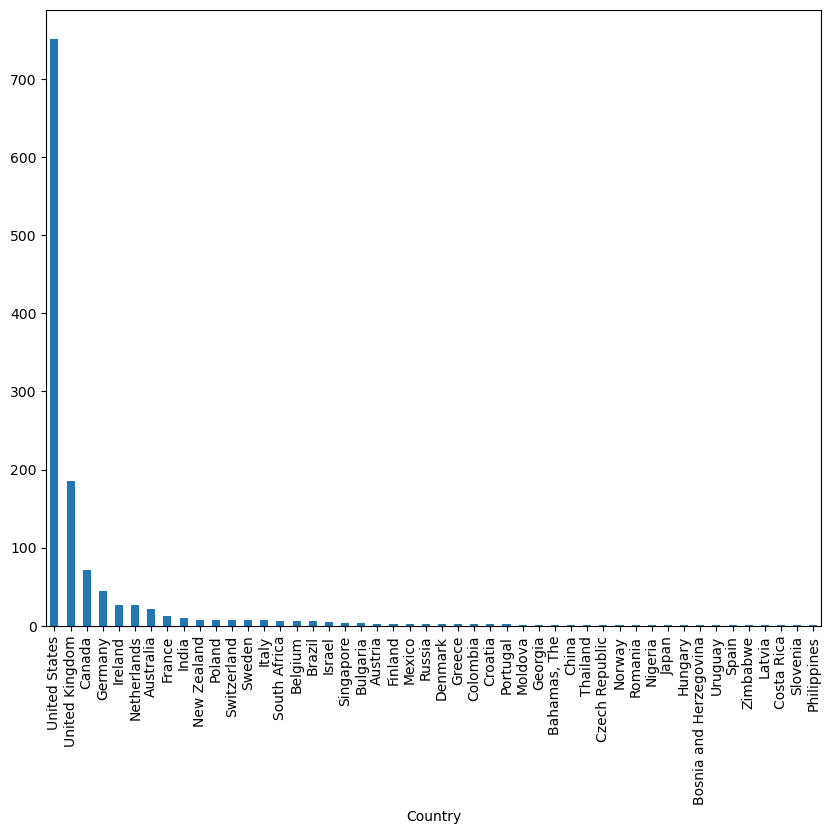

In [5]:
data['Country'].value_counts().plot(kind='bar',figsize=(10,8))

In [6]:
print(data.columns.values)

['Timestamp' 'Age' 'Gender' 'Country' 'state' 'self_employed'
 'family_history' 'treatment' 'work_interfere' 'no_employees'
 'remote_work' 'tech_company' 'benefits' 'care_options' 'wellness_program'
 'seek_help' 'anonymity' 'leave' 'mental_health_consequence'
 'phys_health_consequence' 'coworkers' 'supervisor'
 'mental_health_interview' 'phys_health_interview' 'mental_vs_physical'
 'obs_consequence' 'comments']


In [7]:
data.drop(['Timestamp'], axis=1, inplace=True)

In [8]:
data.drop(['Country'], axis=1, inplace=True)

In [9]:
data.head()

,Age,Gender,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,Female,IL,NaN,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,M,IN,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,Male,NaN,NaN,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,Male,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,Male,TX,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [10]:
data.drop(['state','comments'], axis=1, inplace=True)

In [11]:
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### Handling Null Values And Dealing With Wrongly Entered Data

In [12]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [13]:
data['self_employed'].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [14]:
data['self_employed'].fillna('No',inplace=True)

In [15]:
data['work_interfere'].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

In [16]:
data['work_interfere'].fillna('N/A',inplace=True)

In [17]:
data.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

<Axes: xlabel='Age'>

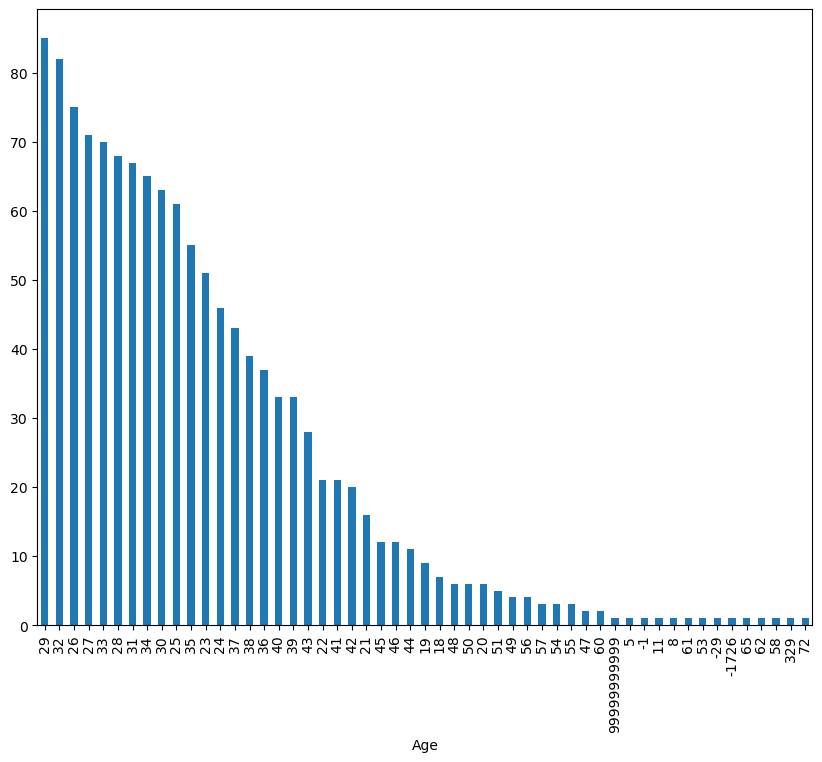

In [18]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [19]:
## let us remove the rows with ages greater than 60 and less than 18 
data.drop(data[(data['Age']>60) | (data['Age']<18)].index,inplace=True)

<Axes: xlabel='Age'>

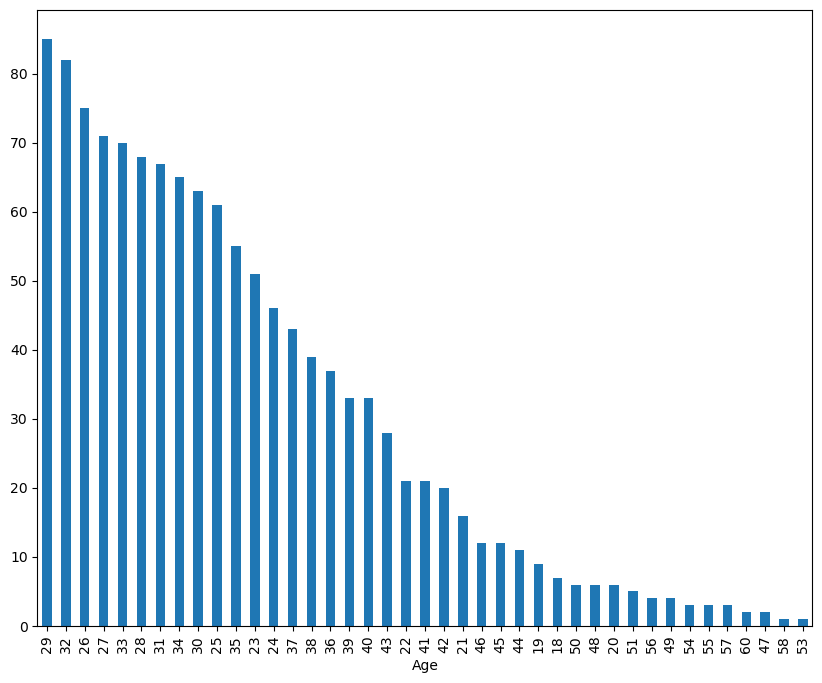

In [20]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

<Axes: xlabel='Gender'>

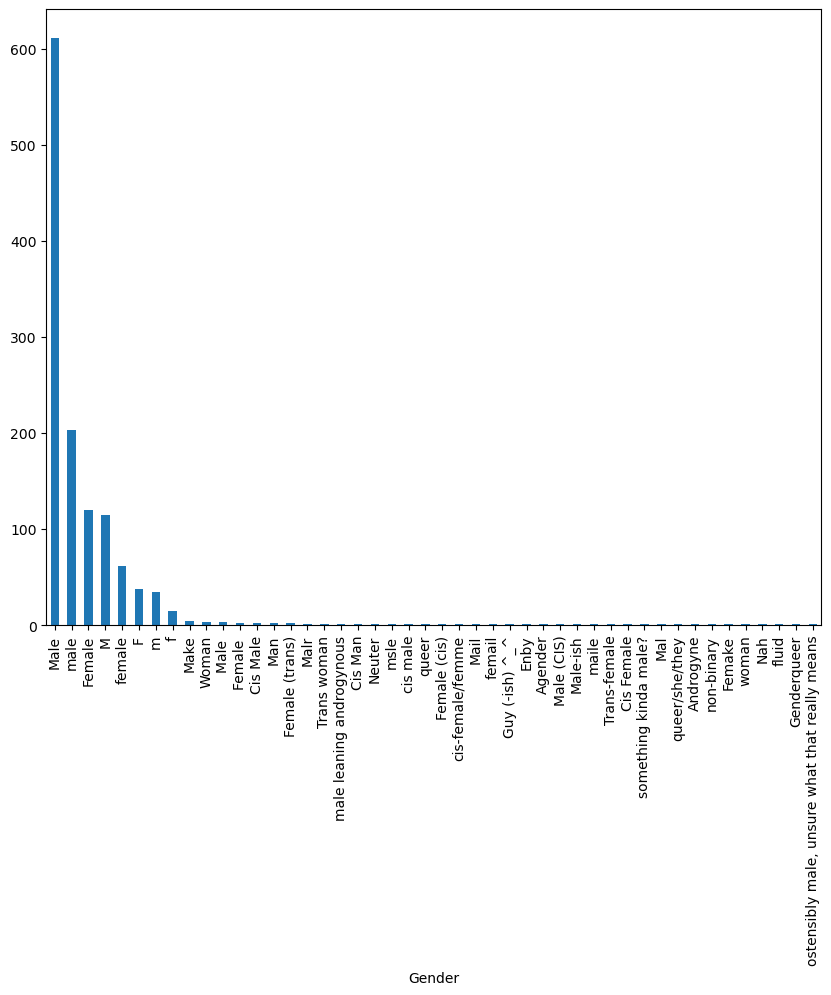

In [21]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [22]:
data['Gender'].replace(['Male ','male','m','M','Male','Cis male','Mail','Male (CIS)','Male-ish','maile','Make','Cis Male','msle','Malr','Mal','Maile','Man','cis male','Cis Man',],'Male',inplace=True)


In [23]:
data['Gender'].replace(['Female ','female','F','f','Woman','Female','femail','Cis Female','cis-female/femme','Femake','Female (cis)','woman',],'Female',inplace=True)

In [24]:
data['Gender'].replace(['Female (trans)','queer/she/they','non-binary','fluid','queer','Androgyne','Trans-female','male leaning androgynous','Agender','A little about you','Nah','All','ostensibly male, unsure what that really means','Genderqueer','Enby','p','Neuter','something kinda male?','Guy (-ish) ^_^','Trans woman',],'Non-Binary',inplace=True)

<Axes: xlabel='Gender'>

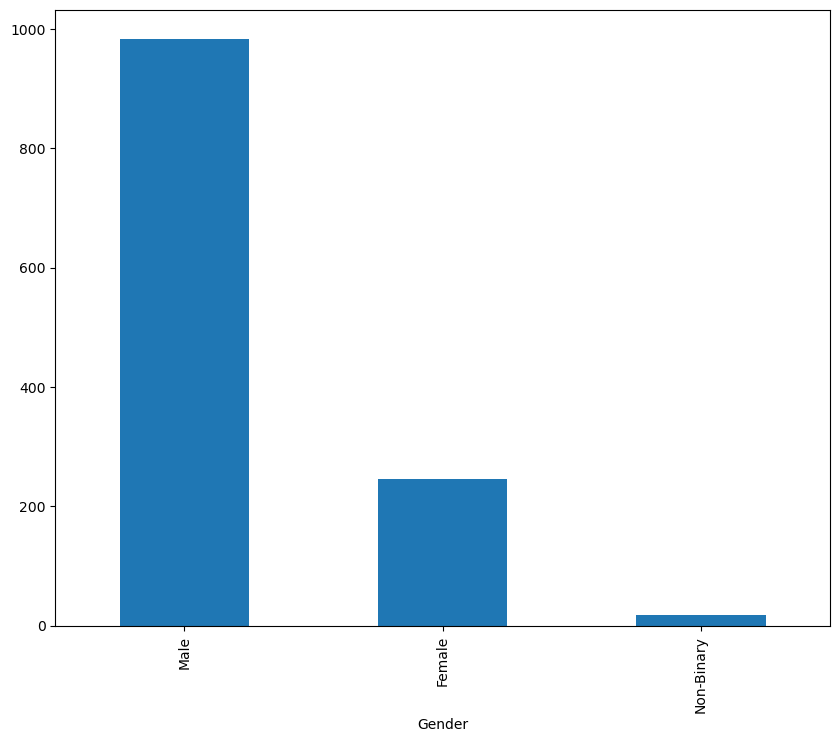

In [25]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [26]:
data['Gender'].value_counts()

Gender
Male          983
Female        246
Non-Binary     18
Name: count, dtype: int64

# Data Analysis And Visualization
### Univariate Analysis

In [27]:

data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


C:\Users\vatha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


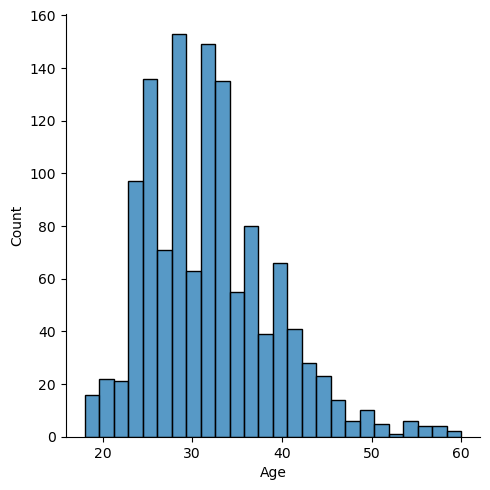

In [28]:
sns.displot(data['Age'])

C:\Users\vatha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'Age')

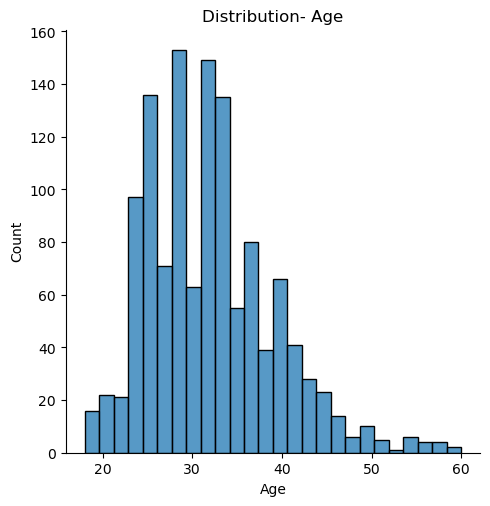

In [29]:
sns.displot(data['Age'])
plt.title("Distribution- Age")
plt.xlabel("Age")

### Bivariate analysis

Text(0.5, 1.0, 'Employed Type')

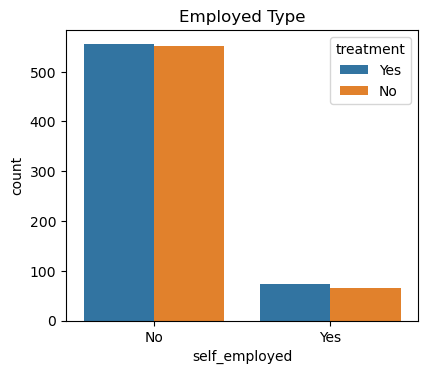

In [30]:
#we are visualising the relationship of various features with respect to treatment, which is our target variable.
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sns.countplot(x=data['self_employed'],hue=data['treatment'])
plt.title("Employed Type")

#### ->There is a vast difference between people who are self employed or not, the number of people who seek treatment in both the categories is more or less similar

Text(0.5, 1.0, 'family_history')

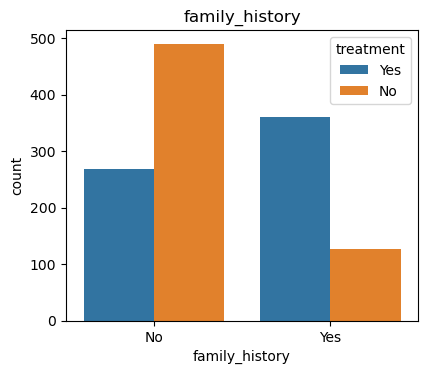

In [31]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(x=data['family_history'],hue=data['treatment'])
plt.title("family_history")

#### ->treatment is directly proportional to family history.  Hence this is an important factor.

Text(0.5, 1.0, 'work_interfere')

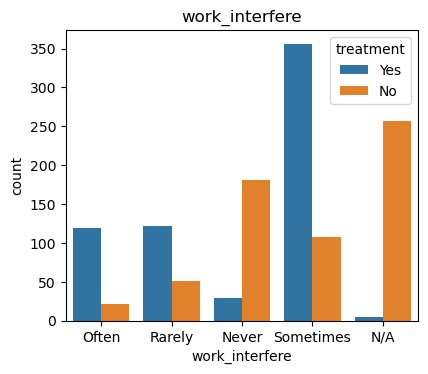

In [32]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,3)
sns.countplot(x=data['work_interfere'],hue=data['treatment'])
plt.title("work_interfere")

#### ->who chose Sometimes were the largest who wanted to get treatment

Text(0.5, 1.0, 'work type')

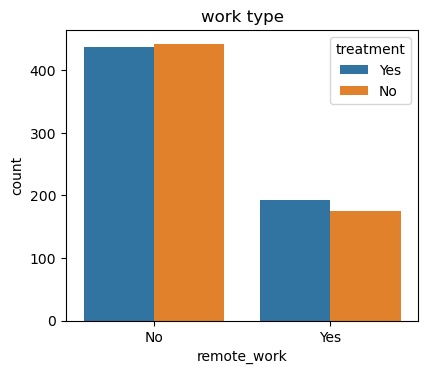

In [33]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,4)
sns.countplot(x=data['remote_work'],hue=data['treatment'])
plt.title("work type")

####  ->the number of people who seek treatment in both the categories is more or less similar and it does not affect our target variable.

Text(0.5, 1.0, 'Company')

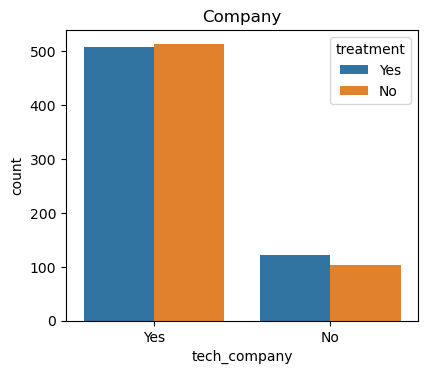

In [34]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,5)
sns.countplot(x=data['tech_company'],hue=data['treatment'])
plt.title("Company")

#### -> irrespective of the field the company of the people falls in, mental health is a big issue.

Text(0.5, 1.0, 'Benefits')

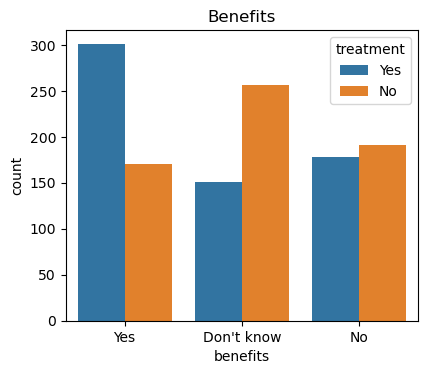

In [35]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,6)
sns.countplot(x=data['benefits'],hue=data['treatment'])
plt.title("Benefits")

#### ->We see that a large group among the people who wanted mental health benefits wanted to seek treatment and also a significant number of people who said No too, wanted to seek treatment.



Text(0.5, 1.0, 'care option')

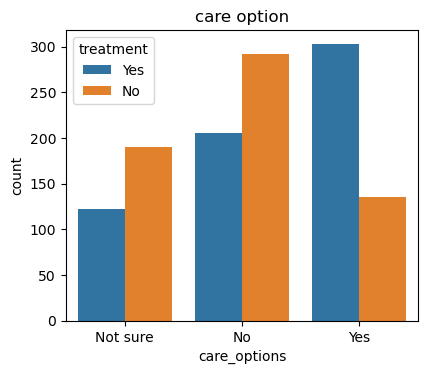

In [36]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,7)
sns.countplot(x=data['care_options'],hue=data['treatment'])
plt.title("care option")

#### ->This graph is quite similar to the benefits column.



Text(0.5, 1.0, 'mental_vs_physical')

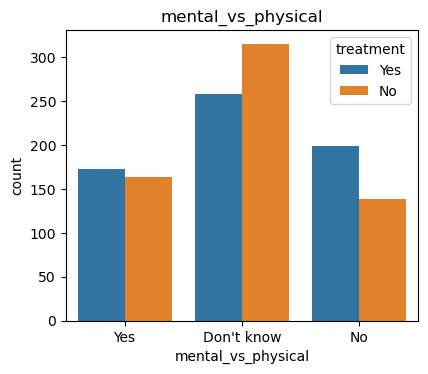

In [37]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sns.countplot(x=data['mental_vs_physical'],hue=data['treatment'])
plt.title("mental_vs_physical")

#### ->half of the people are not aware of the importance given to mental health as compared to physical health, whereas almost equal parts of the other halves answered Yes and No.



Text(0.5, 1.0, 'wellness program')

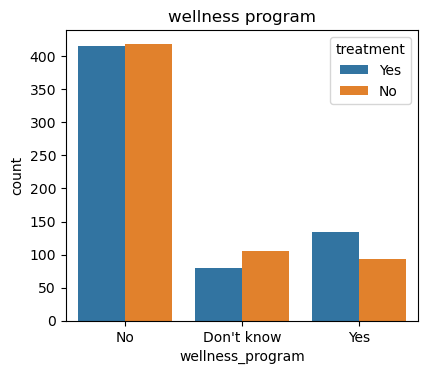

In [38]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,9)
sns.countplot(x=data['wellness_program'],hue=data['treatment'])
plt.title("wellness program")

#### ->almost half of the people who said No want to seek treatment,


Text(0.5, 1.0, 'Anonymity')

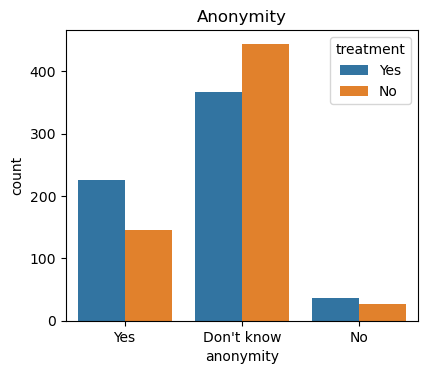

In [39]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,10)
sns.countplot(x=data['anonymity'],hue=data['treatment'])
plt.title("Anonymity")

#### ->most people either answered yes or they are not aware if their anonymity will be protected.

Text(0.5, 1.0, 'Leave')

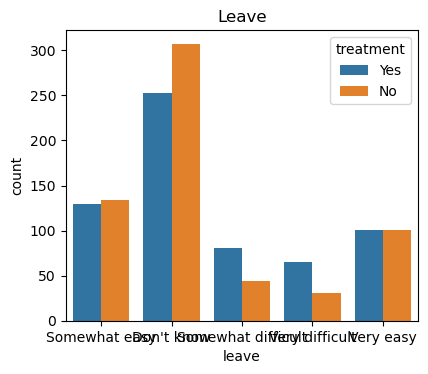

In [40]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,11)
sns.countplot(x=data['leave'],hue=data['treatment'])
plt.title("Leave")

#### -> half of the total people don’t know how easy it is to get a leave due to a mental health condition and they are the ones who want to seek treatment the most.

Text(0.5, 1.0, 'Mental Health Consequence')

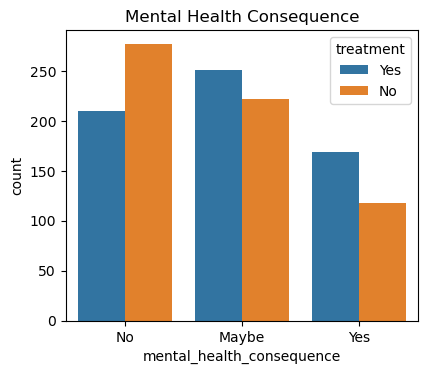

In [41]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,12)
sns.countplot(x=data['mental_health_consequence'],hue=data['treatment'])
plt.title("Mental Health Consequence")

#### ->the majority answered either No or Maybe but around 1/3rd of the people answered yes and they want to seek treatment.

In [42]:
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Text(0.5, 1.0, 'Physical Health Consequence')

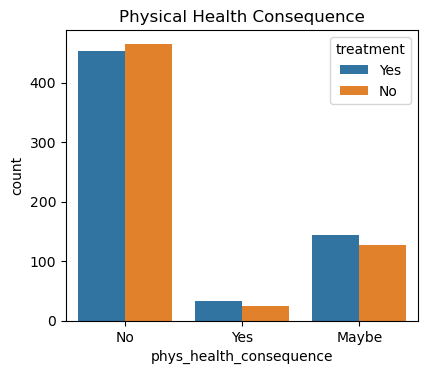

In [43]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,13)
sns.countplot(x=data['phys_health_consequence'],hue=data['treatment'])
plt.title("Physical Health Consequence")

#### -> a very small number of people answered yes to this question, which means that a major number of people do not face negative consequences by discussing their physical health conditions with their employers.

Text(0.5, 1.0, 'Coworkers')

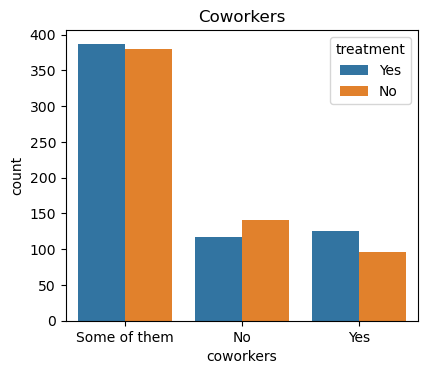

In [44]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,14)
sns.countplot(x=data['coworkers'],hue=data['treatment'])
plt.title("Coworkers")

#### ->more than half of the people were willing to discuss their mental health problems with some or all of their coworkers.

Text(0.5, 1.0, 'Supervisor')

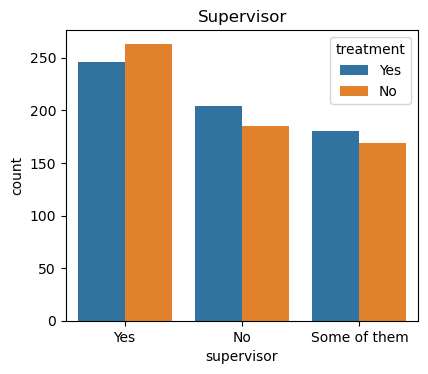

In [45]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,15)
sns.countplot(x=data['supervisor'],hue=data['treatment'])
plt.title("Supervisor")

#### ->This graph again, is in contrast to the above one.  Though majority of people are comfortable with discussing their physical health problems with their supervisor, about 1/3rd of them aren’t comfortable with it.



Text(0.5, 1.0, 'Mental Health Interview')

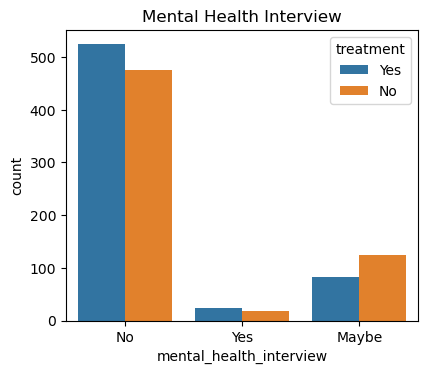

In [46]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,16)
sns.countplot(x=data['mental_health_interview'],hue=data['treatment'])
plt.title("Mental Health Interview")

#### -> very few people are comfortable in bringing up their mental health issue in front of a potential employer.



Text(0.5, 1.0, 'Physical Health Interview')

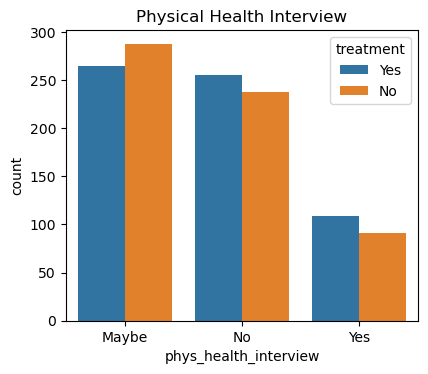

In [47]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,17)
sns.countplot(x=data['phys_health_interview'],hue=data['treatment'])
plt.title("Physical Health Interview")

#### ->Though this graph is similar to the above one with respect to not being comfortable in bringing up a physical health issue with a potential employer, a good number of people may be willing to or are willing to bring it up.



Text(0.5, 1.0, 'Consequence after Disclosure')

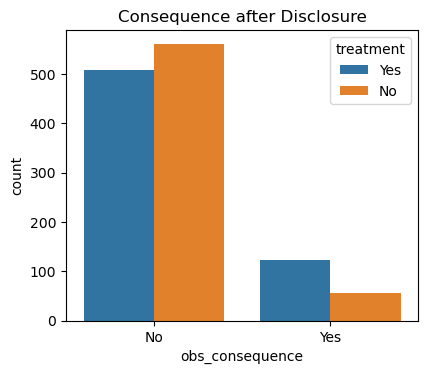

In [48]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,18)
sns.countplot(x=data['obs_consequence'],hue=data['treatment'])
plt.title("Consequence after Disclosure")

#### ->majority of people have not faced any negative consequences after discussing their mental health conditions in their workplace

## Descriptive Analysis

In [49]:
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,3,2,2,2,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,983,1107,759,630,463,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Model Building
### Handling Categorical Values

In [50]:
x=data.drop('treatment',axis=1)
y=data['treatment']

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [52]:
ct=ColumnTransformer([('oe',OrdinalEncoder(),['Gender','self_employed','family_history','work_interfere','no_employees','remote_work','tech_company','benefits','care_options','wellness_program','seek_help','anonymity','leave','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence'])],remainder='passthrough')

In [53]:
x=ct.fit_transform(x)

In [54]:
le=LabelEncoder()
y=le.fit_transform(y)

In [55]:
y

array([1, 0, 0, ..., 1, 0, 1])

In [56]:
x

array([[ 0.,  0.,  0., ...,  2.,  0., 37.],
       [ 1.,  0.,  0., ...,  0.,  0., 44.],
       [ 1.,  0.,  0., ...,  1.,  0., 32.],
       ...,
       [ 1.,  0.,  1., ...,  1.,  0., 34.],
       [ 0.,  0.,  0., ...,  1.,  0., 46.],
       [ 1.,  0.,  1., ...,  0.,  0., 25.]])

In [57]:
import joblib as jl

In [58]:
jl.dump(ct,'feature_value')

['feature_value']

### Splitting Data Into Train And Test

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=49)

In [60]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((872, 22), (375, 22), (872,), (375,))

### Comparing Accuracy Of Various Models

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,classification_report

In [62]:
model_dict={}
model_dict['Logistic regression']=LogisticRegression(solver='liblinear',random_state=49)
model_dict['KNN Classifier']=KNeighborsClassifier()
model_dict['Decision Tree Classifier']=DecisionTreeClassifier(random_state=49)
model_dict['Random Forest Classifier']=RandomForestClassifier(random_state=49)
model_dict['AdaBoost Classifier']=AdaBoostClassifier(random_state=49)
model_dict['Gradient Boosting Classifier']=GradientBoostingClassifier(random_state=49)
model_dict['XGB Classifier']=XGBClassifier(random_state=49)

In [63]:
def model_test(x_train,x_test,y_train,y_test,model,model_name):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('========================================{}======================================================'.format(model_name))
    print('score is : {}'.format(accuracy))
        
    print()

In [64]:
for model_name,model in model_dict.items():
    model_test(x_train,x_test,y_train,y_test,model,model_name)

========================================Logistic regression======================================================
score is : 0.848

========================================KNN Classifier======================================================
score is : 0.784

========================================Decision Tree Classifier======================================================
score is : 0.7946666666666666

========================================Random Forest Classifier======================================================
score is : 0.8533333333333334

========================================AdaBoost Classifier======================================================
score is : 0.864

========================================Gradient Boosting Classifier======================================================
score is : 0.84

========================================XGB Classifier======================================================
score is : 0.84



In [65]:
 #From the above results, it is clear that AdaBoost Classifier provides the best accuracy.
abc=AdaBoostClassifier(random_state=99)
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print("Accuracy of AdaBoost ",accuracy_score(y_test,pred_abc))

Accuracy of AdaBoost  0.864


### Hyperparameter Tuning Of Selected Model

In [66]:
from sklearn.model_selection import RandomizedSearchCV
params_abc={'n_estimators':[int(x) for x in np.linspace(start=1,stop=50,num=15)],'learning_rate':[(0.97+x/100) for x in range(0,8)],}
abc_random=RandomizedSearchCV(random_state=49,estimator=abc,param_distributions=params_abc,n_iter=50,cv=5,n_jobs=-1)

In [67]:
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [68]:
abc_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [69]:
abc_random.best_params_

{'n_estimators': 11, 'learning_rate': 1.02}

In [70]:
abc_tuned=AdaBoostClassifier(random_state=49,n_estimators=11,learning_rate=1.02)
abc_tuned.fit(x_train,y_train)
pred_abc_tuned=abc_tuned.predict(x_test)
print('Accuracy of AdaBoost(tuned)=',accuracy_score(y_test,pred_abc_tuned))

Accuracy of AdaBoost(tuned)= 0.8693333333333333


###### ->We observe that the accuracy has increased approximately by 0.5%.  Though this is not a very great improvement, it is at least better than our previous model.

### Evaluating Performance Of Models

Text(50.722222222222214, 0.5, 'Actual')

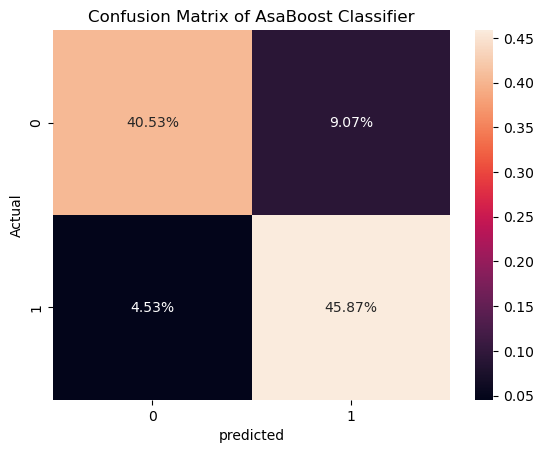

In [71]:
cf_matrix=confusion_matrix(y_test,pred_abc)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%')
plt.title('Confusion Matrix of AsaBoost Classifier')
plt.xlabel('predicted')
plt.ylabel('Actual')

Text(50.722222222222214, 0.5, 'Actual')

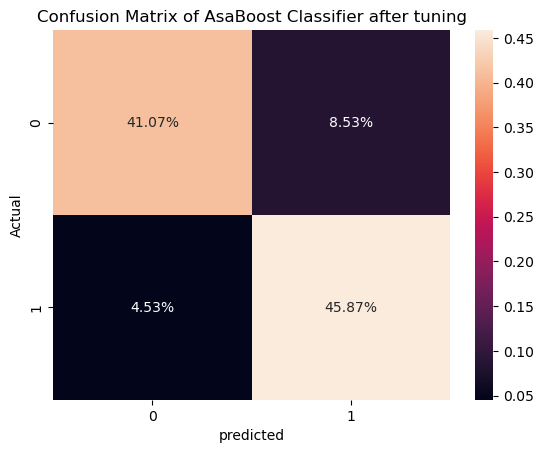

In [72]:
cf_matrix=confusion_matrix(y_test,pred_abc_tuned)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%')
plt.title('Confusion Matrix of AsaBoost Classifier after tuning')
plt.xlabel('predicted')
plt.ylabel('Actual')

In [73]:
import sklearn.metrics as metrics

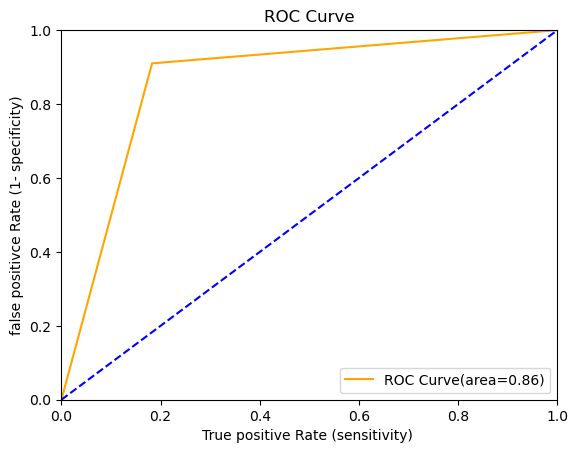

(array([0.       , 0.1827957, 1.       ]),
 array([0.        , 0.91005291, 1.        ]),
 array([inf,  1.,  0.]))

In [74]:
fpr_abc,tpr_abc,thresholds_abc=roc_curve(y_test,pred_abc)
roc_auc_abc=metrics.auc(fpr_abc,tpr_abc)
plt.plot(fpr_abc,tpr_abc,color='orange',label='ROC Curve(area=%0.2f)'%roc_auc_abc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve')
plt.ylabel('false positivce Rate (1- specificity)')
plt.xlabel('True positive Rate (sensitivity) ')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test,pred_abc)

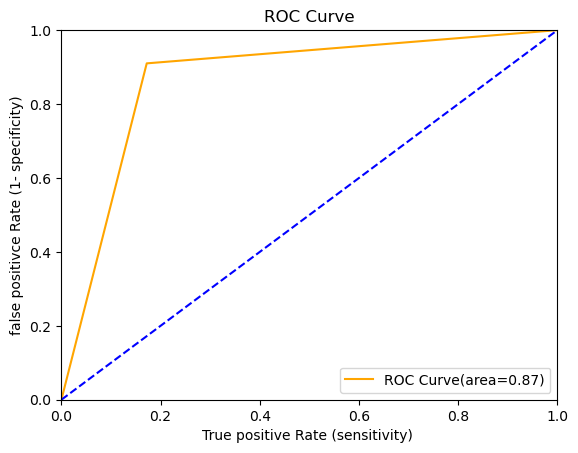

(array([0.        , 0.17204301, 1.        ]),
 array([0.        , 0.91005291, 1.        ]),
 array([inf,  1.,  0.]))

In [75]:
fpr_abc_tuned,tpr_abc_tuned,thresholds_abc_tuned=roc_curve(y_test,pred_abc_tuned)
roc_auc_abc_tuned=metrics.auc(fpr_abc_tuned,tpr_abc_tuned)
plt.plot(fpr_abc_tuned,tpr_abc_tuned,color='orange',label='ROC Curve(area=%0.2f)'%roc_auc_abc_tuned)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve')
plt.ylabel('false positivce Rate (1- specificity)')
plt.xlabel('True positive Rate (sensitivity) ')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test,pred_abc_tuned)

In [76]:
print(classification_report(y_test,pred_abc))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       186
           1       0.83      0.91      0.87       189

    accuracy                           0.86       375
   macro avg       0.87      0.86      0.86       375
weighted avg       0.87      0.86      0.86       375



In [77]:
print(classification_report(y_test,pred_abc_tuned))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       186
           1       0.84      0.91      0.88       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [78]:
import pickle,joblib

In [79]:
pickle.dump(abc_tuned,open('model.pkl','wb'))

In [80]:
data1=pickle.load(open('model.pkl','rb'))

In [81]:
data1.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,

In [82]:
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [83]:
data

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,No,No,Yes,N/A,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,No,No,No,N/A,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [84]:
pickle.dump(abc_tuned,open('model.pkl','wb'))